In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.ticker as ticker

import gif

In [2]:
DOS_TEST = np.loadtxt('DOS_0.dat').view(complex)
E = np.loadtxt('E.dat')
x = np.arange(10)

EE, X = np.meshgrid(E, x)

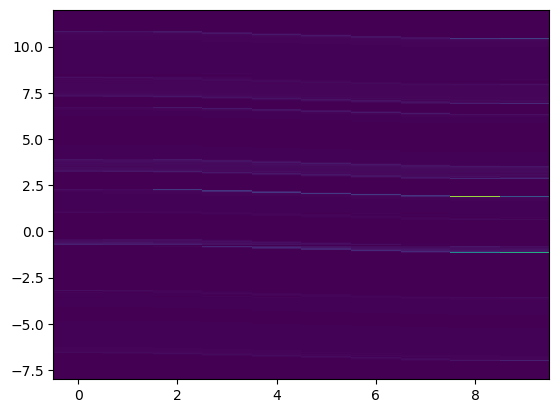

In [3]:
plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [4]:
@gif.frame
def plot_standard():
    plt.pcolormesh(X, EE, DOS_TEST.T.real)

In [5]:
@gif.frame
def plot_gold(i):

    font = {'weight' : 'normal',
	'size'   : 35}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    DOS_TEST = np.loadtxt('DOS_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    Efl_dotted = EFL[i] * np.ones((7))
    Efr_dotted = EFR[i] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (13,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, DOS_TEST.T.real, cmap = 'gist_heat_r', vmin = 0, vmax = 250)
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt_1))
    cbar.ax.set_ylabel('DOS' + ' ' + r'$[\mathbf{\left( eV\cdot nm ^3 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i] - 0.1, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(8.55-0.50, EFR[i] - 0.1, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-4, 10)

In [6]:
frames = [plot_gold(i) for i in range(200)]
gif.save(frames, 'DOS.gif', duration = 100)

frames = [plot_gold(0)]
gif.save(frames, 'DOS_0.gif', duration = 3000)

frames = [plot_gold(199)]
gif.save(frames, 'DOS_199.gif', duration = 3000)

In [7]:
@gif.frame
def plot_idE_gold(i):

    font = {'weight' : 'normal',
	'size'   : 28}
    matplotlib.rc('font', **font)
    def fmt(x, pos):
        a, b = '{:.1e}'.format(x).split('e')
        b = int(b)
        return r'${} \times 10^{{{}}}$'.format(a, b)


    def fmt_1(x, pos):
        return int(x)
    
    IDE_TEST = np.loadtxt('IDE_' + str(i) + '.dat').view(complex)
    E = np.loadtxt('E.dat')
    EFL = np.loadtxt('EFL.dat')
    EFR = np.loadtxt('EFR.dat')
    x = np.arange(10)
    x_fl = np.linspace(-0.5, 9.55, 100)
    Efl_dotted = EFL[i] * np.ones((7))
    Efr_dotted = EFR[i] * np.ones((7))

    EE, X = np.meshgrid(E, x)
    
    plt.figure(figsize = (16,12))
    ax1 = plt.gca()
    ax1.set_xlabel('Transport Direction' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{u.c.}]$')
    ax1.set_ylabel('Energy' + ' '  + r'$[\mathbf{eV}]$')
    plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, norm = colors.SymLogNorm(linthresh = 1e-4, linscale = 1, vmin = -1e-1, vmax = 1e-1), shading = 'auto')
    #plot = plt.pcolormesh(X, EE, IDE_TEST.T.real, cmap = plt.cm.coolwarm, vmin = -2e-3, vmax = 2e-3)
    #norm = colors.SymLogNorm(linthresh = 0.01, linscale = 0.01, vmin = -1.2, vmax = 1.2), shading = 'auto'
    cbar = plt.colorbar(plot, format = ticker.FuncFormatter(fmt))
    cbar.ax.set_ylabel('IDE' + ' ' + r'$[\mathbf{A \cdot \left( eV\cdot nm ^2 \right) ^{-1}}]$')

    ax1.plot(x_fl[0:len(Efl_dotted)], Efl_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')
    ax1.plot(x_fl[-len(Efr_dotted)-1:-1], Efr_dotted, color = 'black', linestyle = 'dashed', linewidth = '4')

    plt.text(0.00+0.20, EFL[i]-0.05, r'$\mathbf{E_{FL}}$', fontsize = 27)
    plt.text(8.55-0.50, EFR[i]-0.05, r'$\mathbf{E_{FR}}$', fontsize = 27)
    plt.ylim(-1, 3)

In [8]:
frames_ide = [plot_idE_gold(i) for i in range(200)]
gif.save(frames_ide, 'IDE.gif', duration = 100)

frames_ide = [plot_idE_gold(0)]
gif.save(frames_ide, 'IDE_0.gif', duration = 3000)

frames_ide = [plot_idE_gold(199)]
gif.save(frames_ide, 'IDE_199.gif', duration = 3000)

Analysing Convergence and comparing to Matlab

In [3]:
m_path = '/home/dleonard/Documents/mathieu_gw_matlab/IEDM_version'
idg_m = np.loadtxt(m_path + '/idg.dat')
ECmin_m = np.loadtxt(m_path + '/ECmin.dat')

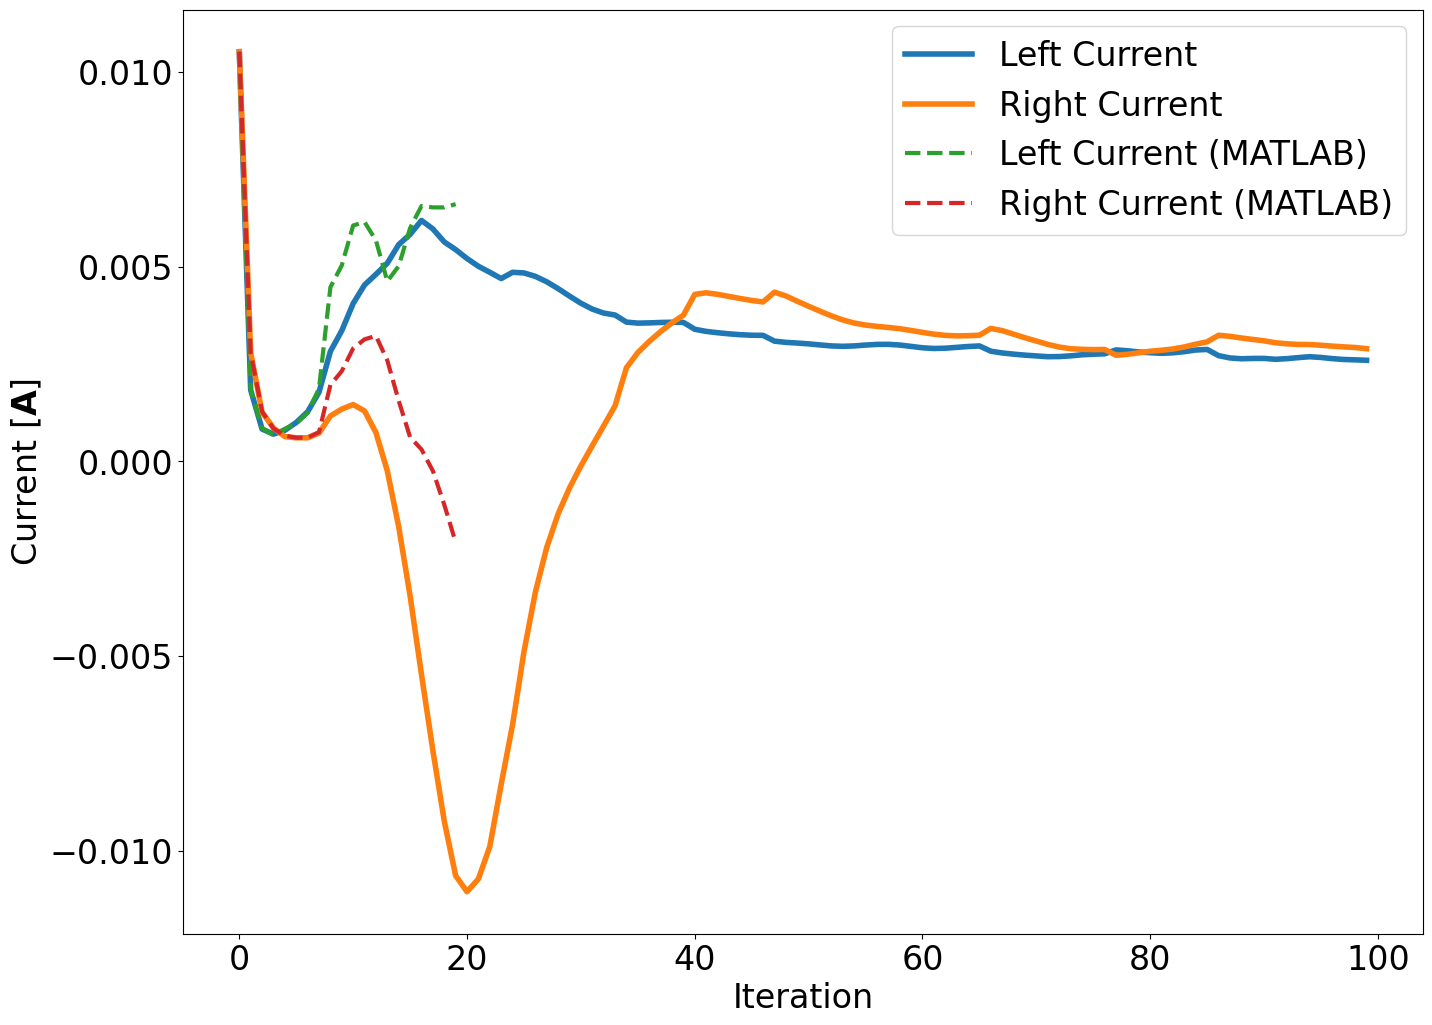

-10.29151112149198 %
[0.01051302 0.00182903 0.0008281  0.00069808 0.00079653 0.00099648
 0.00127046 0.00177467 0.00282178 0.00335399]
[0.01051302 0.00278798 0.00126236 0.0008557  0.00063563 0.00060393
 0.00060489 0.00072587 0.0011636  0.00134049]


In [8]:
num_iter = 100
nblocks = 10
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)

ID_L = np.zeros((num_iter)) # left current
ID_R = np.zeros((num_iter)) # right current
ID_M = np.zeros((num_iter)) # middle current
E = np.loadtxt('E.dat')
dE = E[1] - E[0]
for i in range(num_iter):
    IDE_temp = np.loadtxt('IDE_' + str(i) + '.dat').view(complex)
    ID_L[i] = np.sum(IDE_temp.real, axis = 0)[0] * dE
    ID_R[i] = np.sum(IDE_temp.real, axis = 0)[-1] * dE
    ID_M[i] = np.sum(IDE_temp.real, axis = 0)[nblocks//2] * dE

plt.figure(figsize=(16,12))
plt.plot(np.arange(num_iter), ID_L, label = 'Left Current', linewidth = 4)
plt.plot(np.arange(num_iter), ID_R, label = 'Right Current', linewidth = 4)
#plt.plot(np.arange(num_iter), ID_M, label = 'Middle Current', linewidth = 4)
plt.plot(np.arange(idg_m.shape[0]), idg_m[:,0], label = 'Left Current (MATLAB)', linewidth = 3, linestyle = 'dashed')
plt.plot(np.arange(idg_m.shape[0]), idg_m[:,-1], label = 'Right Current (MATLAB)', linewidth = 3, linestyle = 'dashed')
plt.xlabel('Iteration')
plt.ylabel('Current' + ' ' + r'$[\mathbf{A}]$')
plt.legend()
plt.show()

print((ID_L[-1]-ID_R[-1])/(ID_R[-1]) * 100, '%')
print(ID_L[0:10])
print(ID_R[0:10])


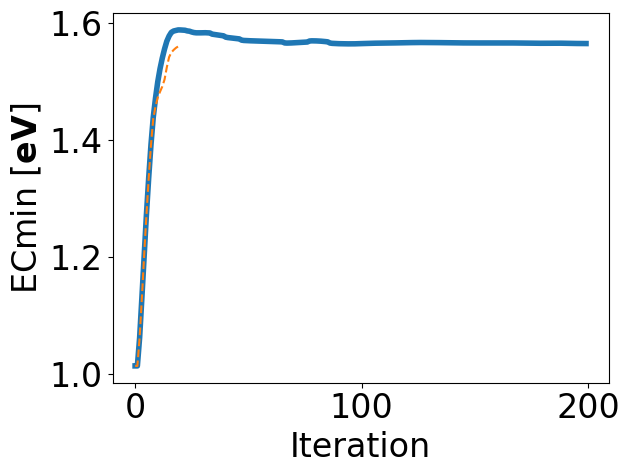

In [9]:
num_iter = 200
font = {'weight' : 'normal',
'size'   : 24}
matplotlib.rc('font', **font)
ECmin_vec = np.loadtxt('ECmin.dat')
plt.figure()
plt.plot(np.arange(num_iter), ECmin_vec[0:num_iter], label = 'Python', linewidth = 4)
plt.plot(np.arange(ECmin_m.shape[0]), ECmin_m, linestyle = 'dashed', label = 'MATLAB')
plt.xlabel('Iteration')
plt.ylabel('ECmin' + ' ' + r'$[\mathbf{eV}]$')
plt.show()


In [5]:
print(ECmin_vec[0:10])

[1.0133     1.01327476 1.06184734 1.13047805 1.2031295  1.27245467
 1.33535875 1.39151087 1.43827234 1.47144458]


In [19]:
IDE_temp = np.loadtxt('IDE_' + str(10) + '.dat').view(complex)
IDE_temp.shape
print(E[0:10])

[-8.    -7.995 -7.99  -7.985 -7.98  -7.975 -7.97  -7.965 -7.96  -7.955]


In [79]:
np.max(DOS_TEST[:, 0])

(115.62428601585327+0j)

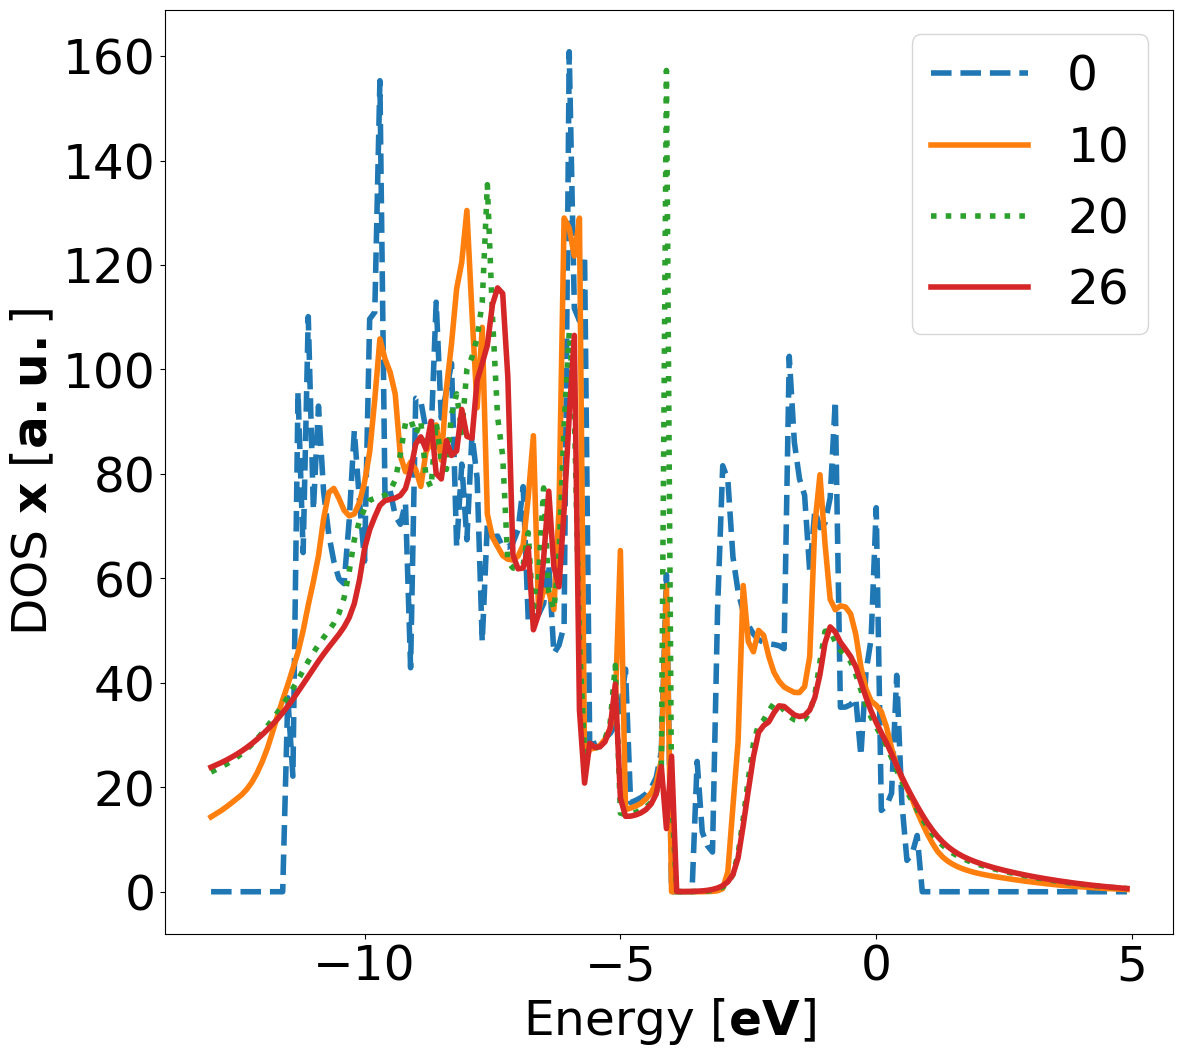

In [80]:
plt.figure(figsize = (13,12))
ax1 = plt.gca()
ax1.set_ylabel('DOS' + ' ' + r'$\mathbf{x}$' + ' ' + r'$ [\mathbf{a.u.}]$')
ax1.set_xlabel('Energy' + ' '  + r'$[\mathbf{eV}]$')

DOS_TEST = np.loadtxt('DOS_' + str(0) + '.dat').view(complex)

plt.plot(E[45:225], DOS_TEST[45:225, 0], label = '0', linewidth = '4', linestyle = 'dashed')
#DOS_TEST = np.loadtxt('DOS_' + str(1) + '.dat').view(complex)
#plt.plot(DOS_TEST[:, 1])
DOS_TEST = np.loadtxt('DOS_' + str(10) + '.dat').view(complex)
plt.plot(E[45:225], DOS_TEST[49:229, 3], label = '10', linewidth = '4')

DOS_TEST = np.loadtxt('DOS_' + str(20) + '.dat').view(complex)
plt.plot(E[45:225], DOS_TEST[52:232, 5],    label = '20', linewidth = '4', linestyle = 'dotted')

DOS_TEST = np.loadtxt('DOS_' + str(26) + '.dat').view(complex)
plt.plot(E[45:225], DOS_TEST[53:233, 0],   label = '26', linewidth = '4', linestyle = 'solid')

plt.legend()
plt.savefig('dos.png', dpi= 150)